# COMP186: Foundations of Artificial Intelligence Individual Coursework

### Sahan Bulathwela, Hossein A. (Saeed) Rahmani, Xiao Fu and Joshua Spear

#### Contact: 

NB: Please do **not** discuss the Coursework in the forum or any other public medium. Please ask directly during office hours or any time via an email directed to the TA assigned to the part of the assignment. The tutor and the TAs will respond either via email or via a public announcement to all students.

If you have any questions/clarifications regarding the coursework, please contact the TA responsible for that part of the coursework **via email**. 
- Part 1: Hossein A. (Saeed) Rahmani (hossein.rahmani.22@ucl.ac.uk)
- Part 2: Xiao Fu (xiao.fu.20@ucl.ac.uk)
- Part 3: Joshua Spear (joshua.spear.21@ucl.ac.uk)

- General Clarifications: Sahan Bulathwela (m.bulathwela@ucl.ac.uk)

This coursework presents a real-world dataset to the learners where they are expected to systematically develop a model that can make good predictions. The coursework attempts to test both the theoretical and practical understanding of the learners regarding training machine learning model. 

## Coursework Structure

This coursework consists of three parts. 

1. Exploratory data analysis and data preparation
2. Model training and evaluation
3. Demonstrating the theoretical understanding of a regression model

Parts 1 and 2 of the coursework involves multiple subtasks of building a machine learning model from data preparation to model evaluation. Part 3 systematically assists the learner to take their mathematical understanding of machine learning and build learning algorithms from scratch. 

## Guidelines to Providing Solutions

- This is an **INDIVIDUAL** coursework.
- The main questions are marked in $\color{red}{red}$ to improve visibility (e.e. $\color{red}{Question\ x.x}$).
- This coursework consists of 3 parts where Part 1 and 2 carry 30 marks each and part 3 carries 40 marks.
- It is expected that learners provide solutions to **ALL** parts of the coursework **in this notebook itself**.
- The learners are expected to provide solutions in this Jupyter notebook itself (Both Code and text answers.).
- The solutions should be provided in the spaces provided. You may add new cells where it is necessary.
- Cells where answers are required in English text is marked with `Your Answer Here`
    - You can use markdown language to add formatting to your text. A cheat sheet is found [here](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)
    - Where you feel that mathematical notation is required, you can use latex syntax (e.g. `$x = 2^5$`:  $x = 2^5$)
    - Alternatively, you are allowed to attach a image of your mathematical derivations.
- Cells where program code is expected, it is marked with `Your Code Here`.
    - You are expected to provide solutions in **Python** programming language
    - You should implement the code in a way that the function signature is preserved where the function skeleton is already provided. 
    - Where external datasets are used, use their **relative path** in the code. This simplifies reproducing results during assessment.
    - Use commenting (`# example comment here`) to describe the crucial steps in your programming code. This will help the examiner to understand your work. 
    
## Uploading Solutions

- It is expected that a **single** `.zip` file is uploaded as the solution. 
- Zip the **same folder** that was provided as the assignment.
- The zipped directory should have the following files.
    - The completed assignment notebook (With Python code and English Text)
    - A PDF printout of the solutions notebook where all the output cells have been executed and the solution outputs are visible in the notebook. (**THIS IS NOT A SEPARATE  PDF REPORT !!!**)
    - The `lectures_dataset.csv`dataset CSV file (in the same relative file location where the file can be loaded to the notebook by executing the relevant cell in the solution notebook.)
    - Any additional data files you generated that become input to your solutions (put the files in the relative file locations that will allow loading the files to the notebook to execute your solution.)
    - A `Instructions_to_marker.txt` file outlining any instructions for the markers.

## Video Lectures Dataset

This coursework works with a collection of video lectures. Different characteristics identified from the meta data, video data and transcripts of the lectures are included in the `lectures_dataset.csv` dataset. 

In [1]:
import pandas as pd
import numpy as np

data_path = "lectures_dataset.csv"
lectures = pd.read_csv(data_path)

In [2]:
lectures.head(3)

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,title_word_count,word_count,most_covered_topic,topic_coverage,duration,lecture_type,has_parts,speaker_speed,silent_period_rate,median_engagement
0,0.013323,0.033309,0.034049,0.035159,0.121392,0.089563,7.753995,75.583936,0.428135,0.553664,...,9,2668,http://en.wikipedia.org/wiki/Kernel_density_es...,0.414578,890,vl,False,2.997753,0.0,0.502923
1,0.014363,0.030668,0.018763,0.036749,0.095885,0.103002,8.305269,86.870523,0.602446,0.584498,...,6,7512,http://en.wikipedia.org/wiki/Interest_rate,0.292437,2850,vl,False,2.635789,0.0,0.011989
2,0.019028,0.033242,0.030720,0.037827,0.118294,0.124255,7.965583,81.915968,0.525994,0.605685,...,3,4264,http://en.wikipedia.org/wiki/Normal_distribution,0.271424,1680,vit,False,2.538095,0.0,0.041627


In [3]:
print(lectures.columns)

Index(['auxiliary_rate', 'conjugate_rate', 'normalization_rate',
       'tobe_verb_rate', 'preposition_rate', 'pronoun_rate',
       'document_entropy', 'easiness', 'fraction_stopword_coverage',
       'fraction_stopword_presence', 'subject_domain', 'freshness',
       'title_word_count', 'word_count', 'most_covered_topic',
       'topic_coverage', 'duration', 'lecture_type', 'has_parts',
       'speaker_speed', 'silent_period_rate', 'median_engagement'],
      dtype='object')


- The dataset contains 11,548 observations 21 potential features and 1 label column. The label we are aiming to predict is `median_engagement` which can take a value between 0 and 1 where values close to 0 exhibit low engagement and values close to 1 indicate high engagement.  

### Description of Columns

The following table describes the columns in the dataset.

|      **Variable Name**     |     **Type**     |
|:--------------------------:|:----------------:|
| auxiliary_rate             | Fraction of auxiliary verbs in the transcript |
| conjugate_rate             | Fraction of conjugates in the transcript |
| normalization_rate         | Fraction of normalisation suffixes used in the transcript |
| tobe_verb_rate             | Fraction of to-be-verbs in the transcript |
| preposition_rate           | Fraction of prepositions in the transcript |
| pronoun_rate               | Fraction of pronouns words in the transcript |
| document_entropy           | Document entropy computed using word counts (Topic coherence) |
| easiness                   | The reading level of the transcript (level of English) |
| fraction_stopword_coverage | Fraction of unique stopwords used in the transcript |
| fraction_stopword_presence | Fraction of stopwords in the transcript |
| subject_domain             | If the subject belongs to STEM or not. |
| freshness                  | How recently the video published |
| title_word_count           | Number of words in the title |
| word_count                 | Number of words in the transcript |
| most_covered_topic         | The Wikipedia URL of the most covered topic |
| topic_coverage             | To what degree is the most covered topic covered |
| duration                   | Duration of the video |
| lecture_type               | Type of lecture (e.g. lecture, tutorial, debate, discussion etc.) |
| has_parts                  | If the lecture is broken into multiple videos |
| speaker_speed              | The word rate of the speaker (words per minute) |
| silent_period_rate         | Fraction of Silence in the transcript where words are not spoken |
| median_engagement          | Median % of video watched by all the viewers who watched it |

# Part 1: Exploratory Data Analysis and Feature Extraction (30 Marks)

This section attempts to understand the dataset before we jump into building a machine learning model. 

## $\color{Red}{Question\ 1.1.}$ What are the different data types each variable in the dataset belong to? 
There are different data types different variables fall into. Based on these data types, we may handle these variables differently. In this question, you are expected to identify which data type each variable in the lecture dataset belongs to. 
- Replace the `Your Answer Here` with your answer
- Possible values: Continuous, Discrete, Ordinal and Categorical

|      **Variable Name**     |     **Type**     |
|:--------------------------:|:----------------:|
| auxiliary_rate             | **Continuous** |
| conjugate_rate             | **Continuous** |
| normalization_rate         | **Continuous** |
| tobe_verb_rate             | **Continuous** |
| preposition_rate           | **Continuous** |
| pronoun_rate               | **Continuous** |
| document_entropy           | **Continuous** |
| easiness                   | **Continuous** |
| fraction_stopword_coverage | **Continuous** |
| fraction_stopword_presence | **Continuous** |
| subject_domain             | **Categorical** |
| freshness                  | **Continuous** |
| title_word_count           | **Continuous** |
| word_count                 | **Continuous** |
| most_covered_topic         | **Categorical** |
| topic_coverage             | **Continuous** |
| duration                   | **Continuous** |
| lecture_type               | **Categorical** |
| has_parts                  | **Categorical** |
| speaker_speed              | **Continuous** |
| silent_period_rate         | **Continuous** |
| median_engagement          | **Continuous** |

In [4]:
lectures.dtypes

auxiliary_rate                float64
conjugate_rate                float64
normalization_rate            float64
tobe_verb_rate                float64
preposition_rate              float64
pronoun_rate                  float64
document_entropy              float64
easiness                      float64
fraction_stopword_coverage    float64
fraction_stopword_presence    float64
subject_domain                 object
freshness                       int64
title_word_count                int64
word_count                      int64
most_covered_topic             object
topic_coverage                float64
duration                        int64
lecture_type                   object
has_parts                      object
speaker_speed                 float64
silent_period_rate            float64
median_engagement             float64
dtype: object

Everything that is float64 or int64 is treated as a continuous variable, and if it is object then it is categorical. See this [repository](https://github.com/sahanbull/context-agnostic-engagement) which uses the same dataset and does variable classification.

## $\color{Red}{Question\ 1.2.}$ Analyse the variables to understand them.
This question expects you to carry out `exploratory data analysis` on the dataset to understand the data and the value distributions better. This enables us to carry out specific pre-processing steps. 
- List the analyses you would carry out with the features and the labels of the dataset. Justify why you think the proposed analyses are appropriate. 
- Carry Out the Analyses you proposed. 
    - **You are NOT permitted to use data analysis libraries that automatically run a brute-force set of analyses on the entire dataset. Usage of such libraries will be penalised.**
    - You may use visualisation libraries such as `matplotlib`, `plotly`, `seaborn` etc.
    - You may also use data processing libraries such as `pandas`, `numpy`, `scipy` etc.
    - You are expected to do as many analyses as you feel necessary to understand the data to make informed decisions about preprocessing.
    - You may use as many code cells as you deem necessary here to carry out your analysis. However, do not include analyses that are not meaningful for understanding the dataset (ones that you are unable to justify).
    - Use a markdown cell on top of the code cells to describe the analysis you are carrying out and its justification. 

#### Choice of Analyses to be carried out with justification

The following steps are not necessarily one after the another. They are intermingled, e.g., visualization at step 3 affects summary stats at step 4. 

0. **Train-validation-test split**: I'll do a training-validation-test split with a 70/15/15 ratio so that I can evaluate different model variants and pick the best one. To prevent [leakage of statistics from the test set](https://mlpr.inf.ed.ac.uk/2023/notes/w2a_train_test_val.html#warning-dont-fool-yourself-or-make-a-fool-of-yourself), from bullet points 1 onwards, all the pre-processing is done solely on the training set.  
1. **Statistics NaN values**: I will look for missing values and quantify their rate of appearance. This helps me decide a method to deal with NaN values. If for a feature the NaN rate is over 80%, I'd just drop it. Otherwise I'll perform mode imputation. 
2. **Convert all features to numbers**: In order to carry-out any analysis, all categorical strings must be turned into discrete numbers.
<!-- Have to clean NaN values, convert categorical variables to discrete numeric ones. -->
3.  **Visualizations**:
  - 3.1 I will plot the correlation matrix. With this I identify features with low correlation to other variables, and thus are irrelevant to the final prediction. Low correlation variables can be dropped without affecting model performance. 
  
4. **Summary statistics**: I will look at the min, max, mean and standard deviation of each feature. This helps me pinpoint outliers and decide whether variables need rescaling
  - 4.1 I will also visualize each feature in a box-plot. This can help us identify the underlying distribution of each feature.

### Analysis 0

I'll do the train-test split using skelearn's builtin function.
I will also check whether all categories of categorical variables are present in both the training set w.r.t the original dataset.

In [5]:
from sklearn.model_selection import train_test_split
import random
random.seed(42)
np.random.seed(42)
def train_val_test_split(df):
  df_train_val, df_test = train_test_split(df, test_size=0.15, random_state=42)
  df_train, df_val =  train_test_split(df_train_val, test_size=0.15, random_state=42)
  return df_train, df_val, df_test

lectures_train, lectures_val, lectures_test = train_val_test_split(lectures)

In [6]:
CAT_VARS = ['subject_domain', 'most_covered_topic', 'lecture_type', 'has_parts']
for cat in CAT_VARS:
  print(cat)   
  print("number of unique values in original dataset: ", lectures[cat].nunique())
  print("number of unique values in training split: ", lectures_train[cat].nunique())


subject_domain
number of unique values in original dataset:  3
number of unique values in training split:  3
most_covered_topic
number of unique values in original dataset:  2096
number of unique values in training split:  1755
lecture_type
number of unique values in original dataset:  17
number of unique values in training split:  17
has_parts
number of unique values in original dataset:  2
number of unique values in training split:  2


I find that the split only caused the 'most_covered_topic' feature to lose some categories (from 2096 to 1755) in the training split. For now this is not a problem, because we'll later find out that this feature is irrelevant and can be dropped since it doesn't contribute to the final prediction due to its low correlation with other features and outcome variable (see Analysis 3). In the case I shouldn't drop it, after one-hot encoding this categorical feature, I can add $2096-1755=341$ dummy columns set to zero to compensate for the missing categories due to the split. This is done in Part 2 later where the validation split missed some categories from 'lecture_type'.

#### Analysis 1

I proceed to check the statistics of missing values in the training set

In [7]:
# Your Code Here
# ORIGINAL CODE FROM https://www.kaggle.com/code/ttminh27/using-autoencoder-to-impute-missing-data
def statMissingValue(X):
    lstSummary = []
    for col in X.columns:
        liTotal = len(X.index)
        liMissing = X[col].isna().sum()
        lfMissingRate = round(liMissing * 100/liTotal,2)
        liZero = 0
        liNUnique = X[col].nunique()
        # if(X[col].dtype!='object'):
        #    liZero = X[col].isin([0]).sum()
        # lfZeroRate = round(liZero*100/liTotal,2)
        lstSummary.append([col,str(X[col].dtype),liTotal, liNUnique, liMissing, lfMissingRate])#,liZero,lfZeroRate])
    return pd.DataFrame(lstSummary,columns=['feature','col_type','total', 'unique', 'na','na_rate'])#,'zero','zero_rate'])

df_stat = statMissingValue(lectures_train)
print(df_stat.feature.to_list())
df_stat

['auxiliary_rate', 'conjugate_rate', 'normalization_rate', 'tobe_verb_rate', 'preposition_rate', 'pronoun_rate', 'document_entropy', 'easiness', 'fraction_stopword_coverage', 'fraction_stopword_presence', 'subject_domain', 'freshness', 'title_word_count', 'word_count', 'most_covered_topic', 'topic_coverage', 'duration', 'lecture_type', 'has_parts', 'speaker_speed', 'silent_period_rate', 'median_engagement']


,feature,col_type,total,unique,na,na_rate
0,auxiliary_rate,float64,8342,7685,0,0.00
1,conjugate_rate,float64,8342,7932,0,0.00
2,normalization_rate,float64,8342,7837,0,0.00
3,tobe_verb_rate,float64,8342,7900,0,0.00
4,preposition_rate,float64,8342,8068,0,0.00
5,pronoun_rate,float64,8342,8128,0,0.00
6,document_entropy,float64,8342,8339,0,0.00
7,easiness,float64,8342,8337,0,0.00
8,fraction_stopword_coverage,float64,8342,258,0,0.00
9,fraction_stopword_presence,float64,8342,8198,0,0.00


There are only missing values for 'has_parts' and 'subject_domain'. I find that 'subject_domain' has almost 50% missing rate, but it should be enough to do variable imputation. I choose mode imputation (I'm aware that this imputation should be done on Question 1.3, however, doing it now facilitates visualization and prevents bugs from happening later, e.g, converting the categorical variables to numeric ones in this dataset with NaN values automatically replaces NaN entries with -1)

In [8]:
def mode_imputation(df, col):
  df[col].fillna(df[col].mode()[0], inplace=True)
  return df

lectures_train = mode_imputation(lectures_train, 'subject_domain')
lectures_train = mode_imputation(lectures_train, 'has_parts')
print("Number of NaN values per feature: ")
lectures_train.isna().sum()

Number of NaN values per feature: 


auxiliary_rate                0
conjugate_rate                0
normalization_rate            0
tobe_verb_rate                0
preposition_rate              0
pronoun_rate                  0
document_entropy              0
easiness                      0
fraction_stopword_coverage    0
fraction_stopword_presence    0
subject_domain                0
freshness                     0
title_word_count              0
word_count                    0
most_covered_topic            0
topic_coverage                0
duration                      0
lecture_type                  0
has_parts                     0
speaker_speed                 0
silent_period_rate            0
median_engagement             0
dtype: int64

#### Analysis 2

I now proceed to convert categorical string to discrete numbers.

In [9]:
# Your Code Here
# lectures_ffill = lectures_train # renaming a single variable because I'm a bit lazy to rename
                                # a multitude of it after debugging
CAT_VARS = ['subject_domain', 'most_covered_topic', 'lecture_type', 'has_parts']
for col in lectures_train.columns:
    if col in CAT_VARS:
      lectures_train[col] = pd.factorize(lectures_train[col])[0]
    else:
      lectures_train[col] = pd.to_numeric(lectures_train[col])


### Analysis 3

I plot the correlation matrix which shows the correlation between each pair of variables.


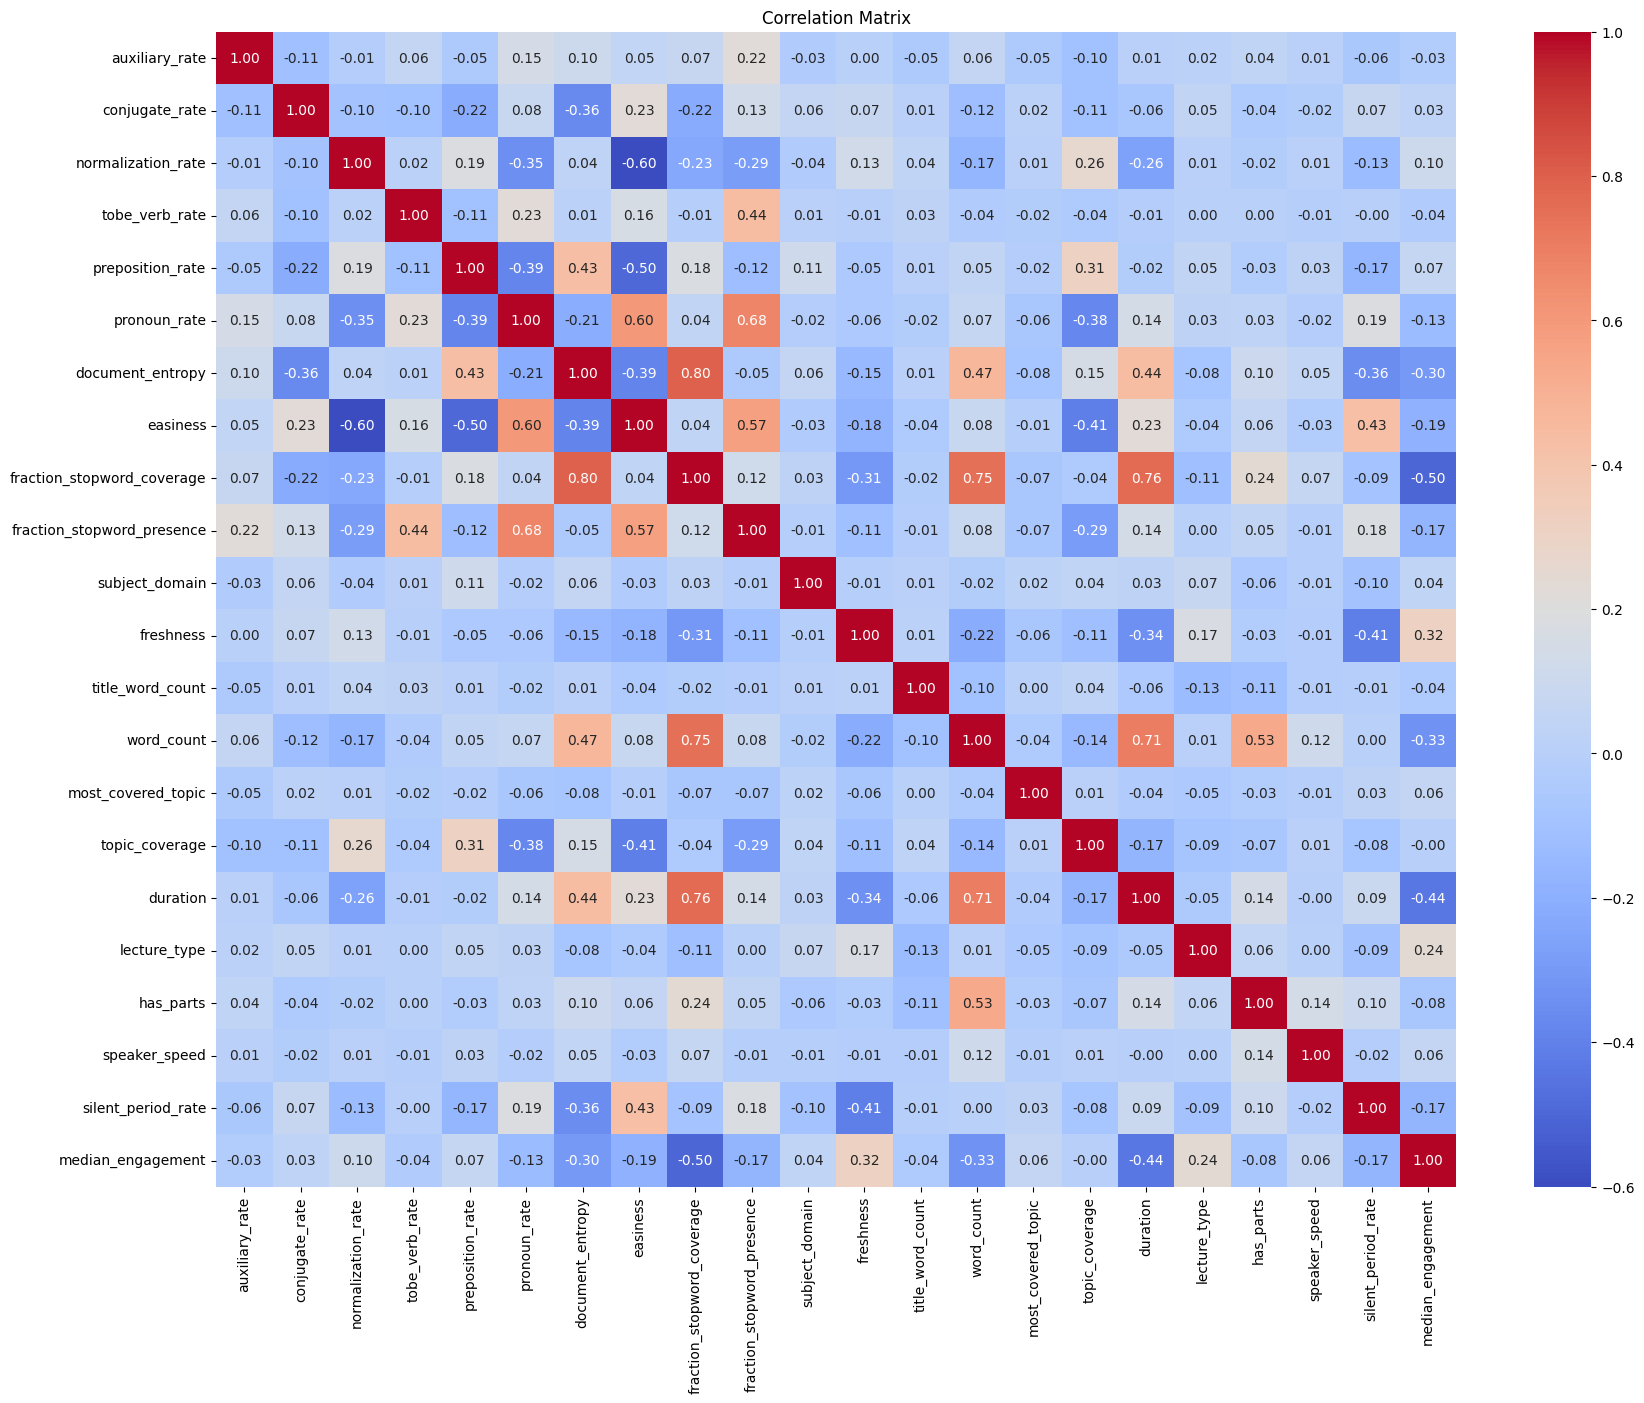

In [10]:
# Calculate the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = lectures_train.corr()

# Plot the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


I see that most_covered_topic has less than $|0.1|$ correlation with the rest of variables, including the outcome, so I'll drop it. Furthermore, conceptually, I can't find some argument to support that URL links contain information that can explain the audience's engagement to a video. 

In [11]:
### THIS CODE CELL CAN ONLY BE RAN ONCE since the column is dropped in-place
def drop_col(df, col):
  df.drop(col, axis=1, inplace=True)
drop_col(lectures_train, 'most_covered_topic')

### Analysis 4

I will obtain summary statistics to decide outliers and which features to normalize


In [12]:
range_df = pd.DataFrame({
    'min': lectures_train.min(),
    'max': lectures_train.max(),
    'mean': lectures_train.mean(),
    'std': lectures_train.std()
})
range_df

,min,max,mean,std
auxiliary_rate,0.000000,0.066667,0.015873,0.005518
conjugate_rate,0.000000,0.492754,0.041015,0.013536
normalization_rate,0.000000,0.101990,0.021258,0.009591
tobe_verb_rate,0.000000,0.172414,0.044158,0.010982
preposition_rate,0.000000,0.216867,0.115992,0.019025
pronoun_rate,0.000000,0.650000,0.123494,0.028634
document_entropy,0.000000,9.278573,7.787113,0.707154
easiness,28.210966,122.032000,84.860970,8.398523
fraction_stopword_coverage,0.000000,0.804281,0.495040,0.144500
fraction_stopword_presence,0.000000,1.000000,0.612944,0.052734


For speaker speed, there is a max value of 881 words/minute even though most values are clustered around 2.5. It is arguable that it is biologically implausible for someone to speak with such speed. The same happens with duration, where there is a max duration of 42520 seconds, equivalent to >11 hours for a video. There was probably a typo with the video's duration. In both cases, it is reasonable to treat them as outliers and remove them. 

In [13]:
# lectures_ffill.loc[11546, :]
lectures_remove_outlier = lectures_train[lectures_train['speaker_speed'] < 800]
lectures_remove_outlier = lectures_remove_outlier[lectures_remove_outlier['duration'] < 42500]
lectures_remove_outlier.describe().loc[['min', 'max', 'mean', 'std']]

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,...,freshness,title_word_count,word_count,topic_coverage,duration,lecture_type,has_parts,speaker_speed,silent_period_rate,median_engagement
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.210966,0.000000,0.000000,...,10840.000000,1.000000,1.000000,0.000000,40.000000,0.000000,0.000000,0.000302,0.000000,0.002721
max,0.066667,0.492754,0.101990,0.172414,0.216867,0.650000,9.278573,122.032000,0.804281,1.000000,...,17430.000000,33.000000,54122.000000,0.712735,10940.000000,16.000000,1.000000,40.605882,1.168239,1.000000
mean,0.015873,0.041016,0.021256,0.044158,0.115991,0.123496,7.787076,84.861750,0.495020,0.612943,...,14807.625899,7.703957,5336.279137,0.318530,2140.723022,1.328058,0.037050,2.405154,0.148072,0.120286
std,0.005519,0.013538,0.009592,0.010983,0.019027,0.028636,0.707209,8.399378,0.144501,0.052740,...,1204.495924,3.802759,5298.101539,0.079723,1495.959740,2.909690,0.188897,1.498345,0.174317,0.167974


After outlier removal, I see that continuous features like freshness, title_word_count, word_count, duration, easiness, and speaker_speed have numerical scales that are orders of magnitude different to the rest, which are between 0 and 20 since they're either categories or ratios. To ensure numerical stability during optimization (don't get extremely large coefficients), I will rescale these features using the MinMaxScaler.  

In [14]:
from sklearn.preprocessing import MinMaxScaler

SCALE_CONT_VARIABLES = ['freshness', 'title_word_count', 'word_count', 'duration', 'speaker_speed', 'easiness']

def min_max_scale(df, colums):
  scaler = MinMaxScaler()
  df[colums] = scaler.fit_transform(df[colums])
  return df

scaled_lectures_rem_outliers = min_max_scale(lectures_remove_outlier,SCALE_CONT_VARIABLES)

### Analysis 4.1

I use boxplots to visualize the distribution of each feature after outlier removal, rescaling

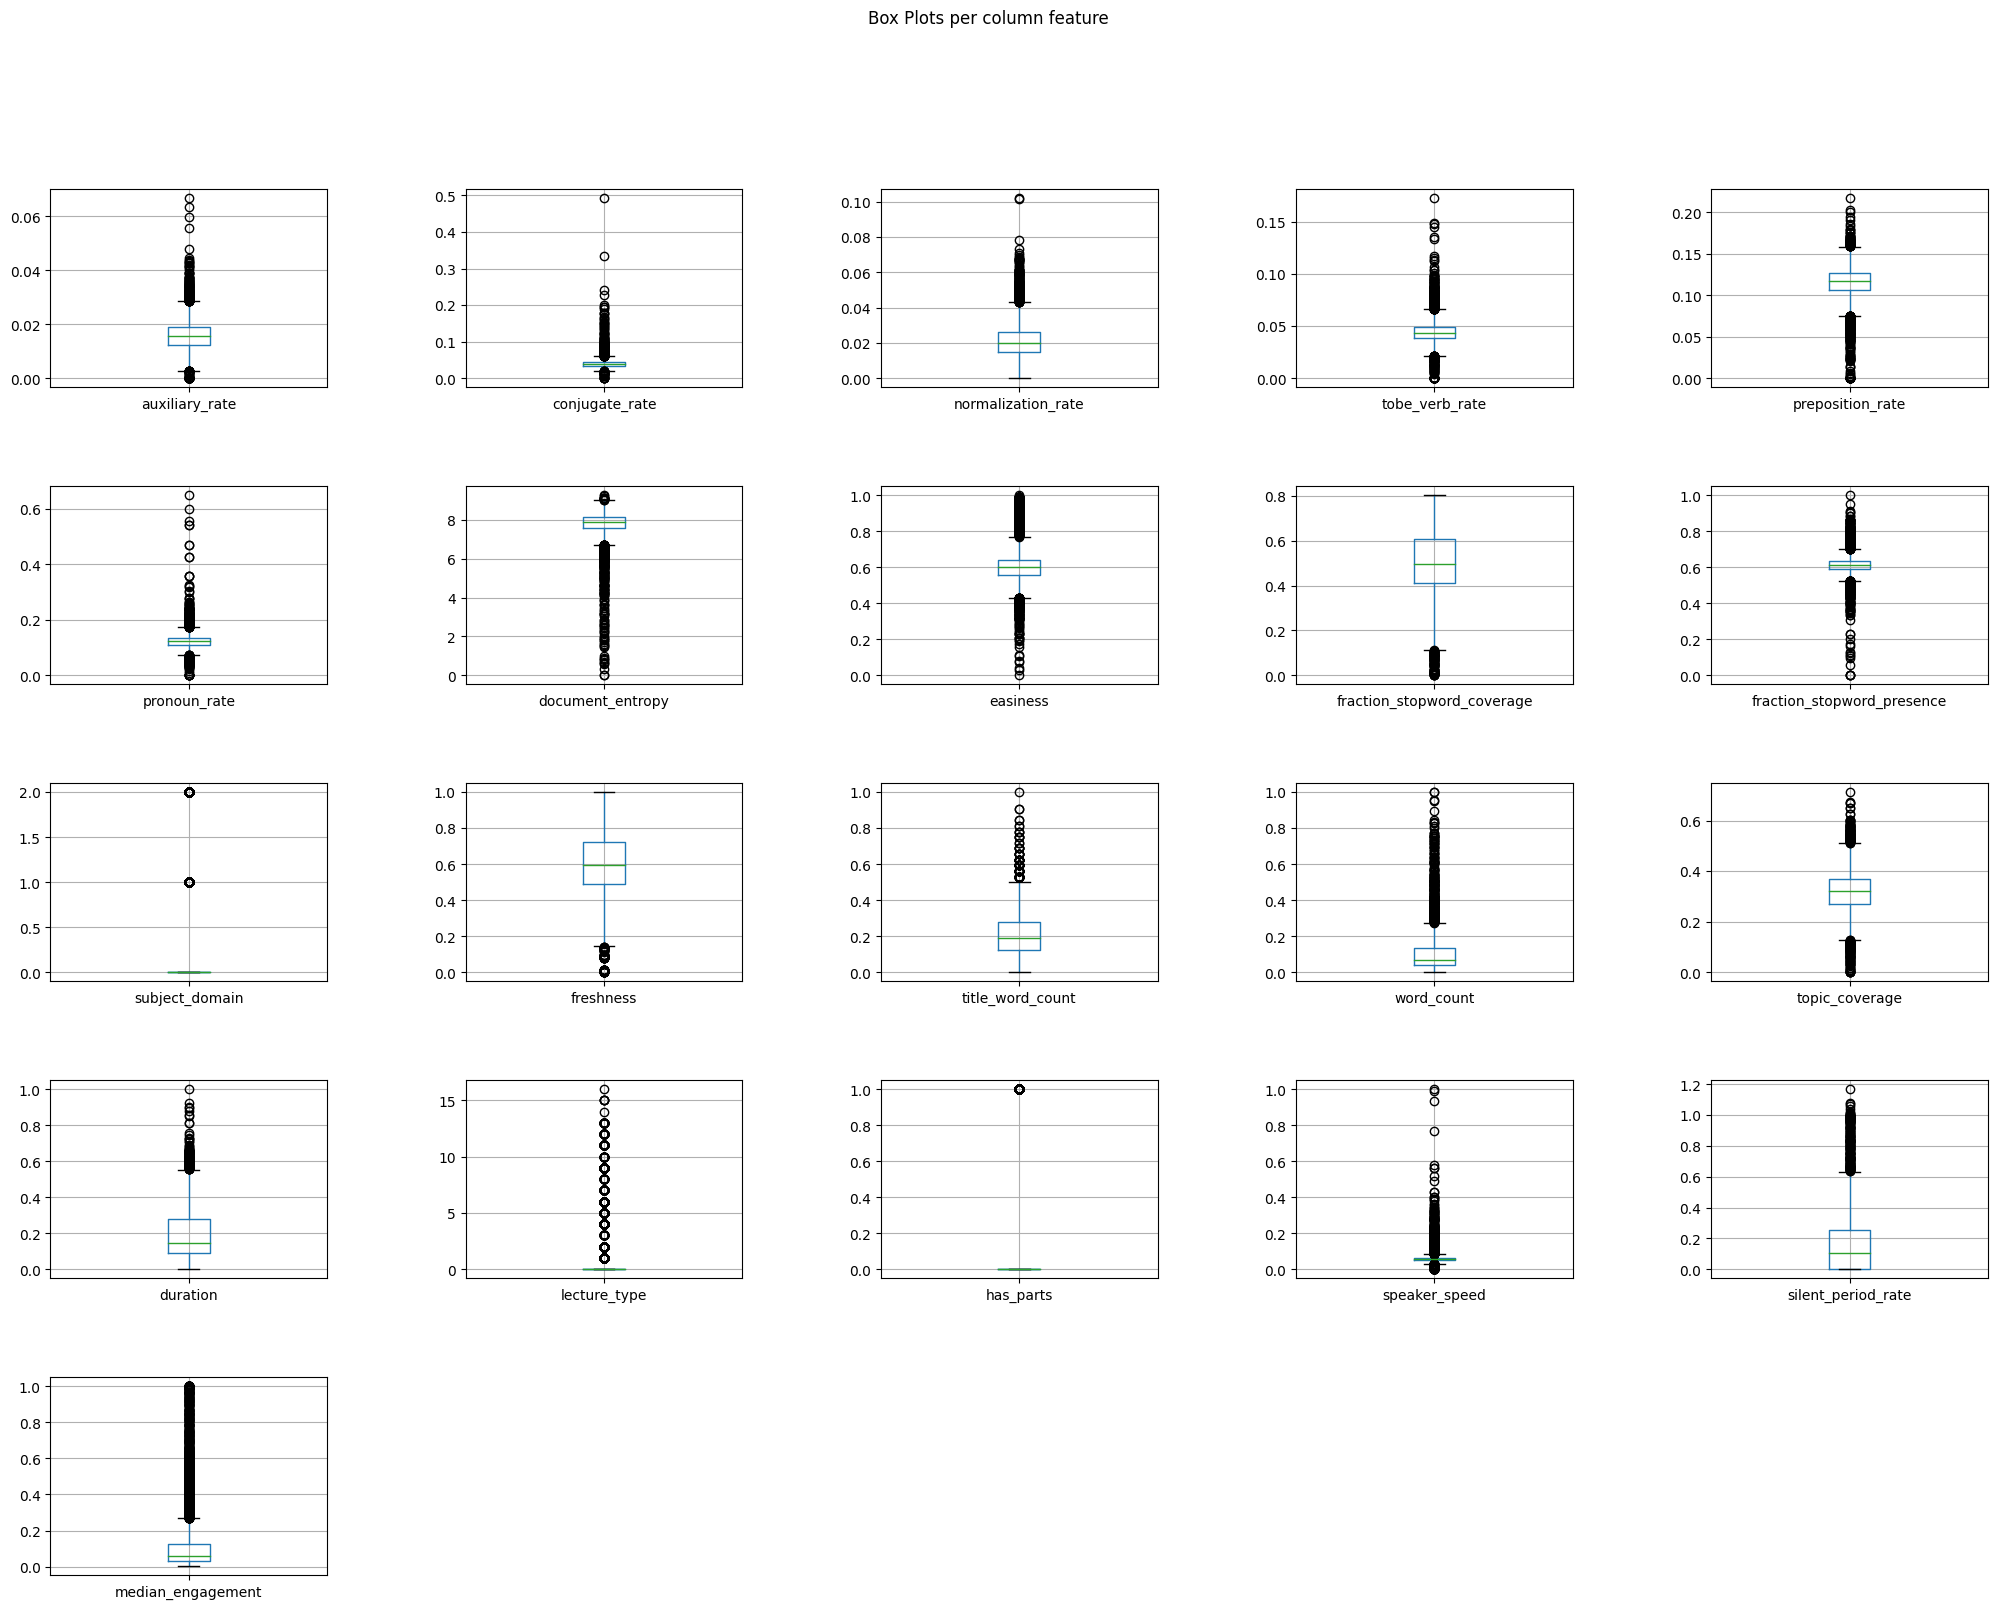

In [15]:
gs = plt.GridSpec(5, 5)

# create a list of subplots
axs = [plt.subplot(gs[i]) for i in range(scaled_lectures_rem_outliers.shape[1])]

# create boxplots for each column
for i, column in enumerate(scaled_lectures_rem_outliers.columns):
    scaled_lectures_rem_outliers[[column]].boxplot(ax=axs[i], vert=True)
    # axs[i].set_title(column)

# customize the plot as desired
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.suptitle('Box Plots per column feature')

fig = plt.gcf()
fig.set_size_inches(25, 18)

# show the resulting plot
plt.show()

Now, all features have roughly the same scale, as noted by the y-axis which have similar range of values. I can also observe a lot of variables which underlying distribution have a slight skew (down would be equivalent to the left in a histogram) for variables like median engagement, duration and title-word count. Furthermore, some features like tobe_verb_rate or auxiliary_rate seem to follow a Gaussian like-distribution. 

#### Question 

Summarise the key findings of your analyses.

**Your Answer Here**

0. The provided dataset has no inherent train-validation-test splits. The following bulletpoints solely refer to the training split. 
1. There was a column 'most_covered_topic' which has extremeley low correlation with the rest of variables.
2. There were 2 outliers in the columns duration and speaker_speed.
3. Some continuous features like 'freshness', 'title_word_count', 'word_count', 'duration', 'speaker_speed', 'easiness' had their original scales too large compared to the rest of variables
4. The box-plots show some variables like median engagement follow a down- (left-)skewed Gaussian distribution. Others variables which are ratios follow a Gaussian-like distribution. 
5. There were missing values for subject_domain (49% missing rate) and has_parts.

## $\color{Red}{Question\ 1.3.}$ Derive conclusions from your analyses and implement data preprocessing.
This question expects you to derive conclusions and implement preprocessing steps based on the analyses carried out in the previous question. Use the markdown cell to propose preprocessing steps and the code cell to implement the preprocessing function.  
- Based on the results obtained in the previous section, identify noteworthy observations (e.g. missing values, outliers etc.)? Describe what you observed and the implications.  
- How are you going to preprocess the dataset based on these observations? Justify your preprocessing steps in relation to the analyses. 
- In the subsequent code cell, implement the `preprocess_lecture_dataset` function to take the entire dataset as input and carry out preprocessing
- You may use additional code cells to implement sub-functions. 

#### Question: Justification

**Your Answer Here.**

0. I performed a train-validation-test split, so the below arguments only apply to the training split. 
1. I did mode imputation as a simple procedure to fill-in missing values for subject_domain and has_parts. The implication is that despite its simplicity and suitability for dealing with categorical data, it is worth noting that imputing missing values with the mode can introduce bias in the data, as it assumes that the missing values are similar to the existing ones. I may see model performance affected due to this bias.
2. I removed datapoints I considered to be outliers. However, unless I can speak to the data collector, I can not be certain that they were outliers. For example, it could be that there did exist a video which lasted for more than 11 hours. Removing it would be equivalent to ignoring a valuable datapoint that influences model's learning. 
3. I min-max scaled some continuous features with large scales. The implication is that while useful to ensure stability during optimization, this distorts the original distribution of values. 
4. I need to perform **one-hot encoding** for categorical variables as this is standard procedure in ML to treat each category as independent to one another. If I don't, discrete variables (1, 2, 3...) may be treated as having an inherent ordering.  

Overall, I'm going to preprocess the dataset as follows:

0. Train-validation-test split as a standard procedure in ML. 
1. Convert all variables to numeric ones. This includes one-hot encoding to categorical variables
2. Perform mode imputation, remove outliers and min-max scaling


In [16]:
NEW_CAT_VARS = ['subject_domain', 'lecture_type', 'has_parts'] # drop most_covered_topic
def one_hot_encode(df, cats):
  df = pd.get_dummies(df, columns=cats, prefix= cats)
  return df
df_clean = one_hot_encode(scaled_lectures_rem_outliers, NEW_CAT_VARS)
print(df_clean.shape, "There are 18 new binary features")

(8340, 40) There are 18 new binary features


In [17]:
def preprocess_lecture_dataset(dataset):
    """
    takes the lecture dataset and transforms it with necessary pre-processing steps.

    Params:
        dataset (pandas.DataFrame): DataFrame object that contains the original dataset provided for the coursework

    Returns:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the dataset after data
                                                pre-processing has been carried out
    """

    # Your Code Here
    ### SOME LIST OF VARIABLES TO TAKE INTO ACCOUNT
    CAT_VARS = ['subject_domain', 'most_covered_topic', 'lecture_type', 'has_parts']
    NEW_CAT_VARS = ['subject_domain', 'lecture_type', 'has_parts'] # drop most_covered_topic
    SCALE_CONT_VARIABLES = ['freshness', 'title_word_count', 'word_count', 'duration', 'speaker_speed', 'easiness']
    
    ### TRAIN-VAL-TEST SPLIT
    dataset_train, dataset_val, dataset_test = train_val_test_split(dataset)
    
    ### FILL NaN VALUES
    dataset_train = mode_imputation(dataset_train, 'subject_domain')
    dataset_train = mode_imputation(dataset_train, 'has_parts')

    ### CONVERT TO NUMERIC DATA TYPE
    for col in dataset_train.columns:
      if col in CAT_VARS:
        dataset_train[col] = pd.factorize(dataset_train[col])[0]
      else:
        dataset_train[col] = pd.to_numeric(dataset_train[col])
    ### DROP IRRELEVANT FEATURE
    drop_col(dataset_train, 'most_covered_topic')
    ### REMOVE OUTLIERS
    dataset_train = dataset_train[dataset_train['speaker_speed'] < 800]
    dataset_train = dataset_train[dataset_train['duration'] < 42500]
    ### MIN-MAX SCALING
    dataset_train = min_max_scale(dataset_train,SCALE_CONT_VARIABLES)
    ### ONE-HOT ENCODING # adds 18 new binary features
    dataset_train = one_hot_encode(dataset_train, NEW_CAT_VARS)
    preprocessed_dataset = dataset_train
    return preprocessed_dataset, dataset_val, dataset_test

In [18]:
preprocessed_lectures, dataset_val, dataset_test = preprocess_lecture_dataset(lectures)

In [19]:
pd.set_option('display.max_columns', 40)
preprocessed_lectures.head(3)
# preprocessed_lectures.isna().sum()

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,freshness,title_word_count,word_count,topic_coverage,duration,speaker_speed,silent_period_rate,median_engagement,subject_domain_0,subject_domain_1,subject_domain_2,lecture_type_0,lecture_type_1,lecture_type_2,lecture_type_3,lecture_type_4,lecture_type_5,lecture_type_6,lecture_type_7,lecture_type_8,lecture_type_9,lecture_type_10,lecture_type_11,lecture_type_12,lecture_type_13,lecture_type_14,lecture_type_15,lecture_type_16,has_parts_0,has_parts_1
3309,0.016096,0.052440,0.029076,0.025961,0.138629,0.082035,7.810552,0.480914,0.385321,0.526480,0.805766,0.40625,0.035328,0.490782,0.077064,0.053529,0.119446,0.103037,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9568,0.008929,0.049107,0.025298,0.035714,0.136905,0.071429,7.533576,0.475092,0.287462,0.552083,0.734446,0.21875,0.012158,0.316295,0.015596,0.077275,0.000000,0.460807,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9139,0.011708,0.044882,0.016782,0.053078,0.137087,0.129574,8.460833,0.621421,0.694190,0.607669,0.535660,0.18750,0.186656,0.323835,0.366972,0.061579,0.211531,0.030606,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## $\color{Red}{Question\ 1.4}$ Numerically encode the dataset for model training.
This question expects you to create the final numerical dataset you will use to carry out model training with ridge regression.

- Implement the `prepare_final_dataset` function to transform different features.
- Features that belong to different data types need to be transformed to an ideal numerical representation
- You may use helper functions in `scikit-learn` machine learning library to implement this function.

Some of what's being asked, like transforming to ideal numerical representation has already been done above through min-max scaling and one-hot encoding

In [20]:
def prepare_final_dataset(preprocessed_dataset):
    """
    takes the preprocessed lecture dataset and transforms it to the vector representation.
    
    Params: 
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the original 
                                                dataset provided for the coursework
        
    Returns:
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
    """
    
    # Your Code Here
    X = preprocessed_dataset.loc[:, preprocessed_dataset.columns != 'median_engagement']
    y = preprocessed_dataset['median_engagement']
    return preprocessed_dataset, X, y

In [21]:
final_dataset, full_X, full_y = prepare_final_dataset(preprocessed_lectures)

In [22]:
full_X.head(3)

,auxiliary_rate,conjugate_rate,normalization_rate,tobe_verb_rate,preposition_rate,pronoun_rate,document_entropy,easiness,fraction_stopword_coverage,fraction_stopword_presence,freshness,title_word_count,word_count,topic_coverage,duration,speaker_speed,silent_period_rate,subject_domain_0,subject_domain_1,subject_domain_2,lecture_type_0,lecture_type_1,lecture_type_2,lecture_type_3,lecture_type_4,lecture_type_5,lecture_type_6,lecture_type_7,lecture_type_8,lecture_type_9,lecture_type_10,lecture_type_11,lecture_type_12,lecture_type_13,lecture_type_14,lecture_type_15,lecture_type_16,has_parts_0,has_parts_1
3309,0.016096,0.052440,0.029076,0.025961,0.138629,0.082035,7.810552,0.480914,0.385321,0.526480,0.805766,0.40625,0.035328,0.490782,0.077064,0.053529,0.119446,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9568,0.008929,0.049107,0.025298,0.035714,0.136905,0.071429,7.533576,0.475092,0.287462,0.552083,0.734446,0.21875,0.012158,0.316295,0.015596,0.077275,0.000000,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9139,0.011708,0.044882,0.016782,0.053078,0.137087,0.129574,8.460833,0.621421,0.694190,0.607669,0.535660,0.18750,0.186656,0.323835,0.366972,0.061579,0.211531,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [23]:
full_y.head(3)

3309    0.103037
9568    0.460807
9139    0.030606
Name: median_engagement, dtype: float64

Let us now save the final data

In [24]:
full_X.to_csv("features_final.csv", index=False)
np.save("labels_final.npy", full_y.to_numpy())

# Part 2: Modeling and Evaluation (30 Marks)

In this section, we develop a model using the preprocessed data. We start by loading the data that we saved in the previous part. 

In [25]:
full_X = pd.read_csv("features_final.csv")
full_y = np.load("labels_final.npy")

# If you didn't manage to save the preprocessed data structures from part one. 
# You can start the exercise with alternative data. But the performance will be very low. 

# full_X = pd.read_csv("features_seed.csv")
# full_y = np.load("labels_seed.npy")

## $\color{Red}{Question\ 2.1}$ Train Ridge Regression Model.
In this question, you are expected to derive a trained ridge regression model. 

- Implement the `train_model` function to output the trained ridge regression model.
- You may use helper functions and models in `scikit-learn` library

In [26]:
from sklearn.linear_model import Ridge

def train_ridge_model(X,y, hyperparams):
    """
    takes the training data with the hyper-parameters to train the ridge model
    
    Params: 
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name, 
                            and the value is the hyperparameter value
        
    Returns:
        ridge_model(scikit-learn model): A trained scikit-learn model object
        :
    """
    
    # Your Code Here
    ### I import the helper function Ridge
    ridge_model= Ridge(**hyperparams)
    ridge_model.fit(X, y)
    
    return ridge_model

- Define the python dictionary `hyperparams` with the hyperparameters needed for Ridge Regression.

In [27]:
hyperparams = {
    # Your Code Here
    'alpha': 0.05,
    'solver':'auto',
    'fit_intercept': True,
}

In [28]:
temp_ridge_model = train_ridge_model(full_X, full_y, hyperparams)

In [29]:
temp_y_ridge = temp_ridge_model.predict(full_X) # predict for debugging

## $\color{Red}{Question\ 2.2}$ Gaussian (RBF) Kernel Regression Model
In this question, you are expected to implement the Gaussian (Radial Basis Function/ RBF) kernel and use it with Ridge Regression to train a Kernel Ridge model that uses the Gaussian Kernel. 

- Implement the `gauss_kernel` function to output the similarity between two points (`x` and `x_dash`) using the Gaussian kernel. 
- You may use helper functions `numpy` and `scipy` libraries to speed up matrix computations. But the function should be implemented by you.

In [30]:
def gauss_kernel(x, x_dash, gamma):
    """
    takes two data points and calculates their similarity using the RBF function. 
    
    params: 
        x (numpy.array): point 1 coordinates 
        x_dash (numpy.array): point 2 coordinates
        gamma : relevant hyperprameter for the Gaussian Kernel
        
    returns:
        similarity (float): similarity between the two points
    """
    
    # Your Code Here
    # The following code is taken from perplexity.ai
    # I'll use matrix notation to speed-up computation of the Gaussian kernel. I can't afford 
    # training for ~10 minutes and debug (I have other commitments such as PhD application)
    
    sq_dists = -2 * x @ x_dash.T + np.sum(x**2, axis=1)[:, np.newaxis] + np.sum(x_dash**2, axis=1)
    
    # Compute the Gaussian kernel matrix
    similarity = np.exp(-sq_dists / (2 * gamma**2))
    return similarity

- Implement the `train_kernel_ridge_model` function to output the trained kernel ridge regression model. 
- Use the relevant parameters in the [`sklearn.kernel_ridge.KernelRidge`](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html#sklearn-kernel-ridge-kernelridge) function to pass the `gauss_kernel` function implemented earlier with kernel regression.
- Training this model may take some time ($\approx$ 10 minutes).

In [31]:
from sklearn.kernel_ridge import KernelRidge

def train_kernel_ridge_model(X,y, hyperparams, kernel_function, kernel_params):
    """
    takes the training data with the hyper-parameters to train the ridge model
    
    Params: 
        X (pandas.DataFrame): DataFrame object that contains the features
        y (numpy.array): List of labels
        hyperparams (dict): a dictionary of hyperparameters where the key is the hyperparameter name, 
                            and the value is the hyperparameter value
        kernel_function (callable): a callable python function which is the kernel function
        kernel_params (dict): a dictionary of kernel parameters where the key is the kernel parameter name, 
                            and the value is the parameter value
        
    Returns:
        kernel_ridge_model(scikit-learn model): A trained scikit-learn model object
    """
    
    # Your Code Here
    kernel_ridge_model = KernelRidge(alpha=hyperparams['alpha'], \
                                     kernel='precomputed')
    K = kernel_function(X.values, X.values, gamma=kernel_params['gamma'])

    kernel_ridge_model.fit(K, y)
    return kernel_ridge_model

In [32]:
hyperparams = {
    "alpha" : 0.1
}

kernel_params = {
    "gamma" : 1e-2
}

temp_kernel_ridge_model = train_kernel_ridge_model(full_X, full_y, hyperparams, gauss_kernel, kernel_params)

In [33]:
temp_y = temp_kernel_ridge_model.predict( gauss_kernel(full_X.values, full_X.values, gamma=1e-2))
# temp_y = temp_kernel_ridge_model.predict(full_X)
print(temp_y)

[0.09366961 0.41891577 0.02782353 ... 0.03452067 0.2667988  0.07157206]


## $\color{Red}{Question\ 2.3}$ Propose and Implement two evaluation metrics that are suitable for model evaluation in this task. 
This question expects you to propose two evaluation metrics that can be used to assess predictive capabilities in this task and implement them.

- Propose two metrics by replacing `Your Answer Here`. 
- implement the two metrics while renaming function names from `eval_metric_1` and `eval_metric_2` to the metrics you are proposing. 

**Metric 1**

**Your Answer Here**

**RMSE** Because the outcome variable is continuous between 0 and 1, I propose the Root Mean Squared Error (RMSE), which measures the average disparity between predicted and actual values. It is sensitive to outliers. It has a theoretical domain of $[0, +\infty)$, and the closer to zero indicates better performance. 

In [34]:
def rmse(y_actual, y_predicted):
    """
    returns the evaluation metric.

    Params:
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels

    Returns:
        metric (float): the evaluation metric
    """

    # Your Code Here

    return np.sqrt(((y_predicted - y_actual) ** 2).mean())

In [35]:
print('ridge regressor training rmse: ', rmse(temp_y_ridge, full_y)) # this is for the ridge regressor
print('Kernel ridge regressor training rmse: ', rmse(temp_y, full_y)) # this is for the kernel ridge regressor

ridge regressor training rmse:  0.12454778884633683
Kernel ridge regressor training rmse:  0.01878110536695967


**Metric 2**

**Your Answer Here**

**Adjusted $R^2$**
I will use the adjusted r-square coefficient. This metric measures the proportion of variance in the outcome variable that is predictable from the independent variables. Its range is in $(-\infty, 1]$, with closer to 1 indicating that the model perfectly predicts the actual outcomes. A value of 0 indicates that the model can't explain the variability of outcome, and any value less than 0 indicates that the model is worse than a baseline that simply predicts the mean of the response data The 'adjusted' adjusts for the number of predictors in the model $p$, which is 39 in this case, as well as number of samples $n$, which is around 8300 samples. This is useful when comparing models with different numbers of predictors, where a model with lower number of predictors but achieving high (maybe not higher) performance is preferable.

In [36]:
def adjusted_r2(y_actual, y_predicted):
    """
    returns the evaluation metric.

    Params:
        y_actual (numpy.array): List of actual labels
        y_predicted (numpy.array): List of predicted labels

    Returns:
        metric (float): the evaluation metric
    """

    # Your Code Here
    n=full_X.shape[0] # don't anticipate that size of training data will change.
    p=full_X.shape[1] # don't anticipate that in this work we'll test complex models with more number of predictors
    r_squared = 1 - (np.sum((y_actual - y_predicted) ** 2) / np.sum((y_actual - np.mean(y_actual)) ** 2))
    adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
    return adjusted_r_squared

In [37]:
print('ridge regressor training adjusted r2: ', adjusted_r2(temp_y_ridge, full_y))
print('Kernel ridge regressor training adjusted r2: ', adjusted_r2(temp_y, full_y))

ridge regressor training adjusted r2:  -0.23306357813947698
Kernel ridge regressor training adjusted r2:  0.9848003731279973


## $\color{Red}{Question\ 2.4}$ Evaluate the performance of the Ridge Regression model to detect overfitting. 
In this question, you are expected to implement a function to evaluate the predictive performance of a trained Ridge Regression model and detect if overfitting is evident. 

- Implement the `evaluate_ridge_model` function to take in the lectures data and
    - do necessary transformation to the data before training the model
    - train the model 
    - evaluate the model using the proposed metrics and 
    - print the relevant information to assess model performance (including overfitting)
- The function does NOT have to return anything. Make sure it prints the relevant metrics instead. 
- You are expected to design the training methodology to end up training the most generalisable model from the data provided.

There are some things I want to clear before implementing my solution:
1. **Model evaluation requires a validation split**: the below 'evaluate_ridge_model' function seems to only take in a training set. I previously performed a train-validation-test split and in this question I'll be using the validation split `dataset_val` to evaluate model performance. I will define a helper function `preprocesses_valid()` to make necessary transformations to the validation split (e.g. one-hot encoding, feature removal). As mentioned previously, in the Analysis section, the validation loses some categories due to splitting. I add dummy categories to compensate for the lost ones.  
2. **Overfitting is a comparative metric between models of different complexity**: I have to at least evaluate 2 models to make a judgement of whether one model has overfitted or not. This is because consider a case where Model A achieves training RMSE of 0.01 and validation RMSE of 0.5. Has it overfitted? We can't say, because it could be that a second candidate of higher complexity, Model B, achieves training RMSE of 0.001 and validation RMSE 0.7. In such a case, and only when I at least have a second candidate, Model B, I can judge that Model B has overfitted w.r.t Model A. In this project, I treat Model A as the Ridge Regressor, which I'll call 'baseline', and Model B as the more complex Kernel Ridge Regressor, which I'll call 'kernel_model'. The reason I consider Model B more 'complex' is because it uses the kernel trick, which could be a proxy for model complexity [in addition to number of parameters](https://arxiv.org/pdf/2310.18988.pdf).  
3. **Ignore hyperparameter optimization**: I will ignore hyperparameter optimization since that is outside the scope of this work (I'm preparing PhD application so I don't have time). I'll make model comparison controling for learning rate of $\alpha=0.05$ since this is a relatively small dataset. 

In [38]:
def preprocesses_valid(dataset):
    """
    takes the validation set and preprocess it
    Params:
        dataset (pandas.DataFrame): DataFrame object that contains the validation split obtained previously

    Returns:
        preprocessed_dataset (pandas.DataFrame): DataFrame object that contains the dataset after data
                                                pre-processing has been carried out
    """

    # Your Code Here
    ### SOME LIST OF VARIABLES TO TAKE INTO ACCOUNT
    CAT_VARS = ['subject_domain', 'most_covered_topic', 'lecture_type', 'has_parts']
    NEW_CAT_VARS = ['subject_domain', 'lecture_type', 'has_parts'] # drop most_covered_topic
    SCALE_CONT_VARIABLES = ['freshness', 'title_word_count', 'word_count', 'duration', 'speaker_speed', 'easiness']
    
    ### FILL NaN VALUES because validation split has missing values for 
    ### the same features
    dataset = mode_imputation(dataset, 'subject_domain')
    dataset = mode_imputation(dataset, 'has_parts')

    ### CONVERT TO NUMERIC DATA TYPE
    for col in dataset.columns:
      if col in CAT_VARS:
        dataset[col] = pd.factorize(dataset[col])[0]
      else:
        dataset[col] = pd.to_numeric(dataset[col])
    ### DROP IRRELEVANT FEATURE
    drop_col(dataset, 'most_covered_topic')

    ### MIN-MAX SCALING
    dataset = min_max_scale(dataset,SCALE_CONT_VARIABLES)
    ### ONE-HOT ENCODING # adds 18 new binary features
    dataset = one_hot_encode(dataset, NEW_CAT_VARS)
    ### COMPENSATING MISSING CATEGORIES
    missing_cols = [col for col in final_dataset.columns if col not in dataset.columns]
    dataset[missing_cols] = 0
    dataset = dataset.reindex(columns=final_dataset.columns)
    X = dataset.loc[:, dataset.columns != 'median_engagement']
    y = dataset['median_engagement']
    return dataset, X, y

In [39]:
_, dataset_val, dataset_test = preprocess_lecture_dataset(lectures)

dataset_val_pre, X_val, y_val = preprocesses_valid(dataset_val)
def evaluate_ridge_model(X,y):
    """
    trains the most viable model using the lecture data for median engagement prediction to evaluate it using the proposed metrics.

    Params:
        X (pandas.DataFrame): features of the dataset
        y (numpy.array): labels
    """

    # Your Code Here

    ### TRAINING BOTH MODELS: baseline AND kernel_model
    ### BASELINE
    baseline_hyperparams = {
    'alpha': 0.05,
    'solver':'auto',
    'fit_intercept': True,
    }
    baseline = train_ridge_model(X, y, baseline_hyperparams)
    ### KERNEL_MODEL
    kernel_hyperparams = {
    "alpha" : 0.05
    }
    kernel_params = {
    "gamma" : 1e-2
    }
    kernel_model = train_kernel_ridge_model(X, y, kernel_hyperparams, gauss_kernel, kernel_params)
    ### EVALUATION
    ### USE TRAINING SET
    ### BASELINE
    baseline_train_pred_y = baseline.predict(X)
    ### KERNEL_MODEL
    kernel_train_pred_y = kernel_model.predict(gauss_kernel(X.values, X.values, gamma=1e-2))

    ### USE VALIDATION SET's X_val, y_val defined above
    ### BASELINE
    baseline_pred_y = baseline.predict(X_val)
    ### KERNEL_MODEL
    kernel_pred_y = kernel_model.predict(gauss_kernel(X_val.values, X.values, gamma=1e-2))

    ### PRINTING RESULTS
    ### TRAINING METRICS
    print('Training')
    print('baseline training rmse: ', rmse(baseline_train_pred_y, y))
    print('kernel_model training rmse: ', rmse(kernel_train_pred_y, y))
    print()
    print('baseline training adjusted r-2: ', adjusted_r2(baseline_train_pred_y, y))
    print('kernel_model training adjusted r-2: ', adjusted_r2(kernel_train_pred_y, y))
    ### VALIDATION METRICS
    print('Validation')
    print('baseline validation rmse: ', rmse(baseline_pred_y, y_val))
    print('kernel_model validation rmse: ', rmse(kernel_pred_y, y_val))
    print()
    print('baseline validation adjusted r-2: ', adjusted_r2(baseline_pred_y, y_val))
    print('kernel_model validation adjusted r-2: ', adjusted_r2(kernel_pred_y, y_val))

In [40]:
evaluate_ridge_model(full_X,full_y)

Training
baseline training rmse:  0.12454778884633683
kernel_model training rmse:  0.00983772089564734

baseline training adjusted r-2:  -0.23306357813947698
kernel_model training adjusted r-2:  0.9962000933771539
Validation
baseline validation rmse:  0.12454775298132584
kernel_model validation rmse:  0.19849041210351479

baseline validation adjusted r-2:  -0.3692717580538769
kernel_model validation adjusted r-2:  -325740890625830.9


#### Question

- Is the model exhibiting overfitting? Justify your answer


**Your Answer Here**

The kernel ridge regressor (i.e. the model with higher complexity using the Kernel trick) exhibits overfitting. It achieves tiny training RMSE as well as close to 1 training adjusted $R^2$ compared to the baseline. However, this is accompanied by a larger validation RMSE than the baseline's, as well as close to $-\infty$ adjusted $R^2$ when evaluated over the validation split. The baseline seems to perform better on unseen data since it doesn't memorize the training distribution.

I additionally run both models on the test set and furthermore confirm kernel_model performs worse than the baseline

In [41]:
_, dataset_val, dataset_test = preprocess_lecture_dataset(lectures)
dataset_test_pre, X_test, y_test = preprocesses_valid(dataset_test)
def test_ridge_model(X,y, X_test, y_test):
    """
    trains the most viable model using the lecture data for median engagement prediction to evaluate it using the proposed metrics.

    Params:
        X (pandas.DataFrame): features of the dataset
        y (numpy.array): labels
    """

    ### TRAINING BOTH MODELS: baseline AND kernel_model
    ### BASELINE
    baseline_hyperparams = {
    'alpha': 0.05,
    'solver':'auto',
    'fit_intercept': True,
    }
    baseline = train_ridge_model(X, y, baseline_hyperparams)
    ### KERNEL_MODEL
    kernel_hyperparams = {
    "alpha" : 0.05
    }
    kernel_params = {
    "gamma" : 1e-2
    }
    kernel_model = train_kernel_ridge_model(X, y, kernel_hyperparams, gauss_kernel, kernel_params)
    

    ### USE TEST SET's X_test, y_test defined above
    ### BASELINE
    baseline_pred_y = baseline.predict(X_test)
    ### KERNEL_MODEL
    kernel_pred_y = kernel_model.predict(gauss_kernel(X_test.values, X.values, gamma=1e-2))

    ### PRINTING RESULTS
    ### TEST METRICS
    print('Testing')
    print('baseline testing rmse: ', rmse(baseline_pred_y, y_test))
    print('kernel_model testing rmse: ', rmse(kernel_pred_y, y_test))
    print()
    print('baseline testing adjusted r-2: ', adjusted_r2(baseline_pred_y, y_test))
    print('kernel_model testing adjusted r-2: ', adjusted_r2(kernel_pred_y, y_test))
test_ridge_model(full_X, full_y, X_test, y_test)


Testing
baseline testing rmse:  0.21080566806747555
kernel_model testing rmse:  0.2205970876904035

baseline testing adjusted r-2:  -4.89100496688578
kernel_model testing adjusted r-2:  -9.456748224643703e+66


# Part 3: Ridge Regression: From Theory to Implementation (40 Marks)

In this section, we focus on understanding Ridge Regression better. Ridge Regression is the main modelling tool that we use throughout this coursework. It introduces a penalty to the objective of the model if the linear weights become too big. 

This part of the coursework expects the learner to gradually implement the ridge regression using matrix operations using python. This is expected to help the learners connect the mathematical derivations to the actual programmatic realisation of the learning algorithms. 

__Hints__: 
- All X,y inputs in the proceeding assumes multiple _observations_ are being passed

### Dataset

We use a pre-created dataset for this part of the exercise. Let us load the dataset. 

In [42]:
full_X = pd.read_csv("features_seed.csv")
full_y = np.load("labels_seed.npy")

## $\color{Red}{Question\ 3.1}$ Transform the data to matrix representations that are suitable for training a Ridge Regression model.  
In this question, you are expected to implement a function of the feature and label data which outputs two objects representing matrix/vector(s) in such a format which is usable by the `scikit-learn` fit/predict API.

- Implement the `prepare_data_for_training` function to take in the features and labels and return feature matrix/vector and label matrix/vector back. 
    - the function should take `pandas.DataFrame` objects as input. These DataFrames should have the data values that are passed to the `fit()` function of the `scikit-learn` model (ie. after all the preprocessing and other transformations)
    - you are expected to determine the suitable dimensionality for the output matrices
- You must NOT use any `scikit-learn` or any other machine learning library's functions within this function. It will be penalised.

In [43]:
def prepare_data_for_training(X, y=None):
    """
    returns the matrices that are passed in to the training function of the ridge regression.

    Params:
        X (pandas.DataFrame): Features in the dataset
        y (pandas.DataFrame): Labels in the dataset, Optional

    Returns:
        X (numpy.array): X matrix/vector passed to the Ridge Regression training
        y (numpy.array): y matrix/vector passed to the Ridge Regression training
    """

    # Your Code Here

    X = X.values  # conver .csv to numpy array
    n, _ = X.shape
    X_augmented = np.concatenate((X, np.ones((n, 1))), axis=1) # I'm going to add a 
                                                               # column of 1s for the intercept
    if y is not None:
        y = y.reshape(-1, 1)  # avoid shape mismatch during matrix multiplication
    return X_augmented, y

In [44]:
X_, y_ = prepare_data_for_training(full_X, full_y)

## $\color{Red}{Question\ 3.2}$ Implement the training and prediction functions of the Ridge Regression model (primal form).  
This question expects you to implement the training and prediction capabilities of the ridge regression model. 

- Implement the `fit_ridge_reg` function to take in the features, labels and the hyper-parameters to return the trained parameters of the model. 
- You are expected to use the Primal form when implementing the fitting step.
- You are NOT allowed to use `scikit-learn` functions here. It will be penalised.

In [45]:
def fit_ridge_reg(X, y, hyperparams):
    """
     Params:
        X (numpy.array): X matrix/vector passed to the Ridge Regression training
        y (numpy.array): y matrix/vector passed to the Ridge Regression training
        hyperparams (dict): a dictionary where the key is the hyperprameter name 
                            and values is the hyperprameter value
        
    Returns:
       _theta (numpy.array): the trained parameters of the model
    """
    
    # Your Code Here
    # Code from perplexity.ai
    n, d = X.shape # n is number of samples, d is number of features
    I = np.identity(d)
    _theta = np.linalg.inv(X.T @ X + hyperparams['lambda'] * I) @ X.T @ y
  
    return _theta    

In [46]:
hyperparams = {
    "lambda": 0.001
}

theta = fit_ridge_reg(X_, y_, hyperparams)

In [47]:
print("The shape of theta matrix/vector: {} \n\n The values are: \n {}".format(theta.shape, theta))

The shape of theta matrix/vector: (7, 1) 

 The values are: 
 [[-0.48418088]
 [ 0.66264088]
 [ 1.30120135]
 [-0.26920015]
 [ 0.27774184]
 [-0.53857572]
 [ 0.11972292]]


- Implement the relevant parts of the `RidgeRegression` class below.
    - add relevant object attributes including hyperparameters
    - `fit` and `predict` functions need to be implemented as well 
- You may reuse the functions you implemented previously in this part of the assignment
- You are NOT allowed to use `scikit-learn` functions here. It will be penalised. 

In [48]:
class RidgeRegression():
    def __init__(self, hyperparams):
        """
        intantiates the class
        
        Params:
            hyperparams (dict): a dictionary where the key is the hyperprameter name 
                            and values is the hyperprameter value
        """
        
        self.fitted = False # indicates whether the model is already trained or not
        
        # Your Code Here
        self.hparams = hyperparams
        self.theta = None
        
    def fit(self, X, y):
        """
        trains the model given the data. Updates  models internal parameters

        Params:
            X (pandas.DataFrame): Features in the dataset
            y (pandas.DataFrame): Labels in the dataset
        """
        
        # Your Code Here
        if X.shape[1] != 7:
            X, y = prepare_data_for_training(X, y) # ensure there is an intercept
        # Reuse the function for closed form solution of parameters 
        self.theta  = fit_ridge_reg(X, y, self.hparams)
        self.fitted = True
        
    def predict(self, X):
        """
        makes predictions from given features. 
        ! The model should be trained first. Otherwise throws an error.

        Params:
            X (pandas.DataFrame): Features in the dataset
        """
        
        # Your Code Here
        if self.fitted == False:
          raise ValueError("The model is not trained yet. ")
        else:
          if X.shape[1] != 7:
            X, _ = prepare_data_for_training(X) # ensure there is an intercept
        
          y_pred = X @ self.theta
          return y_pred

In [49]:
hyperparams = {
    "lambda": 0.001
}

RR = RidgeRegression(hyperparams)

In [50]:
print("Attributes of the RidgeRegression Instance Before Training: \n{}".format(RR.__dict__))

Attributes of the RidgeRegression Instance Before Training: 
{'fitted': False, 'hparams': {'lambda': 0.001}, 'theta': None}


- Train the model with the appropriate data using the `fit` function of the model instance.

In [51]:
RR.fit(full_X, full_y)

In [52]:
print("Attributes of the RidgeRegression Instance After Training: \n{}".format(RR.__dict__))

Attributes of the RidgeRegression Instance After Training: 
{'fitted': True, 'hparams': {'lambda': 0.001}, 'theta': array([[-0.48418088],
       [ 0.66264088],
       [ 1.30120135],
       [-0.26920015],
       [ 0.27774184],
       [-0.53857572],
       [ 0.11972292]])}


**Question**:

- Get predictions from the trained model and show that the predictions have a linear correlation with the actual labels. For __this question__, you are allowed to use scientific computing packages such as `scikit-learn` or `sciPy`

It is unclear what the question cares about. 
1. If it is simply asking for a correlation coefficient, I can treat the predictions and labels as random variables and compute their Pearson coefficient via the formula $corr(X, Y) = \frac{cov(X, Y)}{sd(X)sd(Y)}$, where cov is covariance, sd is standard deviation of the random variable. Here, values closer to -1 or 1 indicate strong inverse or direct correlation, respectively. Close to 0 indicates no correlation.

2. Another interpretation of the question is in the context of model evaluation. In such case, I should use the $R^2$ coefficient of determination, which measures the proportion of the variance of the outcome that is predictable from the model. Close to 0 indicates no explanatory power and close to 1 strong explanatory power. I'll put a plot for visualization

### 1) Pearson correlation

In [53]:
# Your Code Here
ypreds = RR.predict(full_X)
correlation_score = np.corrcoef(full_y[None, :], ypreds.T)
correlation_score[0, 1]

0.16320990287545153

A score of $0.16$ indicates a very weak direct correlation between predicted and actual values.
#### 2) $R^2$ coefficient 


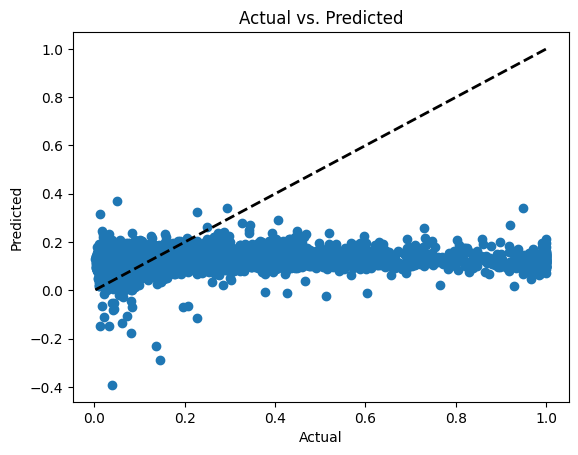

R-squared: 0.026637469681914938


In [54]:
from sklearn.metrics import r2_score
# Your Code Here

# Visualize the correlation between the predictions and the actual labels
plt.scatter(full_y, ypreds)
plt.plot([full_y.min(), full_y.max()], [full_y.min(), full_y.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()

# Compute the R-squared score
r2 = r2_score(full_y, ypreds)
print('R-squared:', r2)


A values of $0.03$ is evidence of very weak correlation, which also means the model, under the current hyperparameter configuration and number of predictors, fails to explain most of the variance in the outcome.  This is supported by how the line doesn't cross the scattered points

**Question**: Why did you use the above method? Justify your answer

**Your Answer Here**

I'm not sure what the question's focus is. I used Pearson because it is an agnostic measure of correlation between variables. I prefer, however, to use $R^2$ since in this context I can interpret a low $R^2$ coefficicent as the model failing to explain the variance of the outcome, meaning that the model underfits the data and needs to increase its complexity perhaps by using more predictors

## $\color{Red}{Question\ 3.3}$ Ridge Regression in the Online Learning Setting
In this question, we create several building blocks required to learn with Ridge Regression in an online setting using stochastic gradient descent. You are first expected to derive the first derivative of the Ridge Regression loss function. 

- Implement the `ridge_reg_loss_derivative` function to take in the features, labels, parameters and hyperparameters to return the first derivative $\frac{\delta \mathcal{L}}{\delta \theta}$ of the loss $ \mathcal{L}$. 

In [55]:
def ridge_reg_loss_derivative(X, y, theta, hyperparams):
    """
    takes data, parameters and hyperparameters to calculate the first derivative of ridge loss
    
    Params:
        X (numpy.array): a matrix/vector of features 
        y (numpy.array): a matrix/vector of labels 
        theta (numpy.array): a matrix/vector of parameters being trained 
        hyperparams (dict): a dictionary where the key is the hyperprameter name 
                            and values is the hyperprameter value
                            
    Returns:
        derivative (numpy.array): the derivative used for updating the parameters
    """
    
    # Your Code Here
    n = len(y)
    y_pred = X @ theta
    error = y_pred - y
    derivative = (1/n) * (X.T @ (error) + hyperparams['penalty'] * theta) 

    return derivative

- Implement the `train_stoch_ridge_reg` function to take data, parameters and hyperparameters  and return the updated theta
- You are not allowed to use machine learning libraries such as `scikit-learn` or tensor computation libraries such as `tensorflow`, `keras`, `pytorch` etc. in this section. You will be penalised for using such libraries. 

In [56]:
def train_stoch_ridge_reg(X, y, _theta, hyperparams):
    """
    takes data, parameters and hyperparameters and returns the updated parameters 
    from training with data
    
    Params:
        X (numpy.array): a matrix/vector of features 
        y (numpy.array): a matrix/vector of labels 
        _theta (numpy.array): a matrix/vector of parameters being trained 
        hyperparams (dict): a dictionary where the key is the hyperprameter name 
                            and values is the hyperprameter value
                            
    Returns:
        _theta (numpy.array): a matrix/vector of parameters updated after training
    """
    
    # Your Code Here
    # I will do full-batch gradient descent since it is faster and it is 
    # not specified in this question to compute the derivative per each datapoint. 
    derivative = ridge_reg_loss_derivative(X, y, _theta, hyperparams)# (1/m) * (X_i.T @ (h - y_i)) + (lamda/n) * theta
    
    _theta = _theta - hyperparams['learning_rate'] * derivative

    return _theta
    

## $\color{Red}{Question\ 3.4}$ Train and Monitor the Stochastic Ridge Regression Model
In this question, you are expected to use the previously defined stochastic gradient training function (`train_stoch_ridge_reg`) to train a ridge regression model using the `X_, y_` data structures from before. Record the relevant loss values computed in each iteration to analyse if the loss is diminishing over time. 

- Implement `train_entire_model` function to take the dataset and train the model over multiple iterations. 
    - Run the model for 2000 iterations to reduce the loss values over time
- Record the loss $\mathcal{L}$ values of the model over all the iterations.
- pass the list of losses as output from this function.

**Hints:**

- Set the initial weights (thetas) to a normal distribution scattered around mean 0. 
- As the penalisation constant in the Ridge Regression, 0.1 is a good value to use
- A learning rate between 1e-6 and 1e-10 may be suitable for this task

In [57]:
def train_entire_model(X_, y_, hyperparams):
    """
    takes data, hyperparameters and returns the list of losses 
    
    Params:
        X_ (numpy.array): a matrix/vector of features 
        y_ (numpy.array): a matrix/vector of labels 
        hyperparams (dict): a dictionary where the key is the hyperprameter name 
                            and values is the hyperprameter value
                            
    Returns:
        losses ([float]): list of loss values for each iteration of learning
    """
    
    # Your Code Here
    n, d = X_.shape
    losses = []
    
    # Initialize theta with random values from a normal distribution
    theta = np.random.normal(0, 1, (d, 1))
    
    # print(theta)
    for i in range(hyperparams['epochs']): # set to 2000 iterations
        # do full-batch gradient descent
        theta = train_stoch_ridge_reg(X_, y_, theta, hyperparams)
        # Compute the loss
        loss = np.mean((X_ @ theta - y_) ** 2) + hyperparams['penalty'] * np.sum(theta ** 2)
        losses.append(loss)
    return losses

In [58]:
X_, y_ = X_, y_ # Reusing data structures from before

hyperparameters = {
    # Your Code Here
    'epochs':2000,
    'learning_rate': 1e-8,
    'penalty': 0.1
}

losses = train_entire_model(X_, y_, hyperparameters)

- Implement the `visualise_loss_values` function to use the appropriate visualisations to plot the loss values in a meaningful way.
- The function does not have to return anything. Display the visualisation as a step within the implemented function.

In [59]:
def visualise_loss_values(loss_values):
    """
    takes relevant loss values and plots the loss values in the dataset over the iterations (epochs).
    
    Params:
        loss_values (dict): a dictionary that contains the loss values where key is the loss type
                            and values are the loss values.
    """
    # Your Code Here
    title =  "Ridge Regression Training Loss with hparams: lr = {0}, penalty = {1}".\
              format(hyperparameters['learning_rate'], hyperparameters['penalty'])
    # Create a line plot of the loss values over the training iterations
    plt.plot(range(1, hyperparameters['epochs']+1), loss_values, marker='.')
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.show()


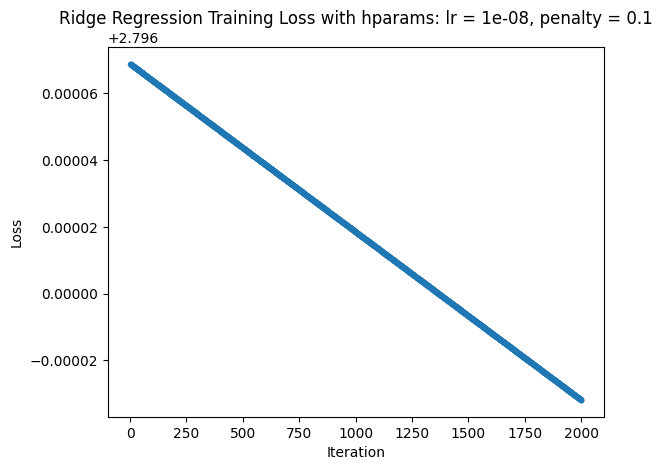

In [60]:
visualise_loss_values(losses)

**Question:**
- Does the loss get smaller over time? In either case, explain the reason behind it.
- For both the regularisation factor and the learning rate, plot the loss with a sample of larger and smaller values for each hyperparameter. Observe how the loss changes for each hyperparameter _individually_ and draw hypotheses justifying these observations. 
    - __Note: you do not need to interpret the joint effects of changing the hyperparameter values__

### 1) Varying learning rate

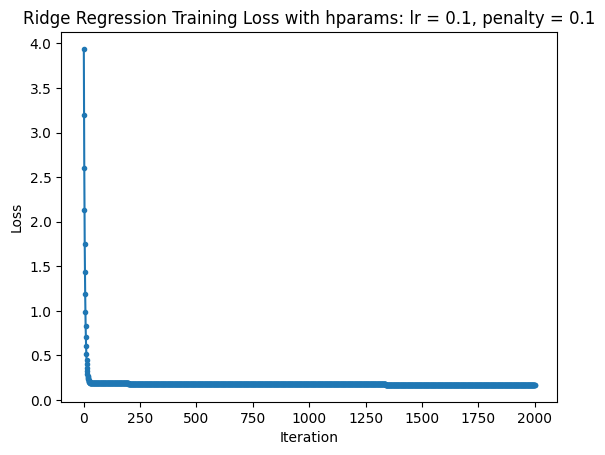

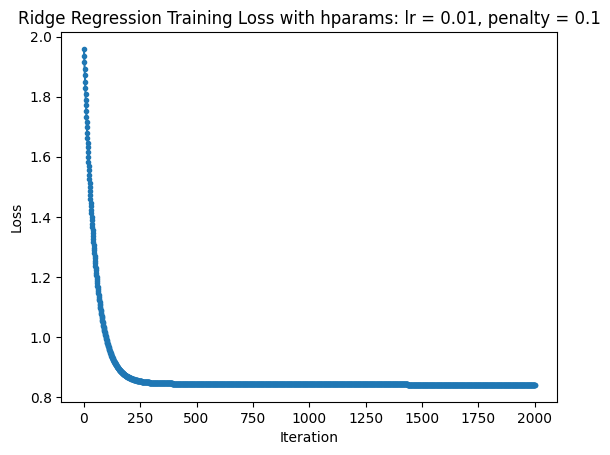

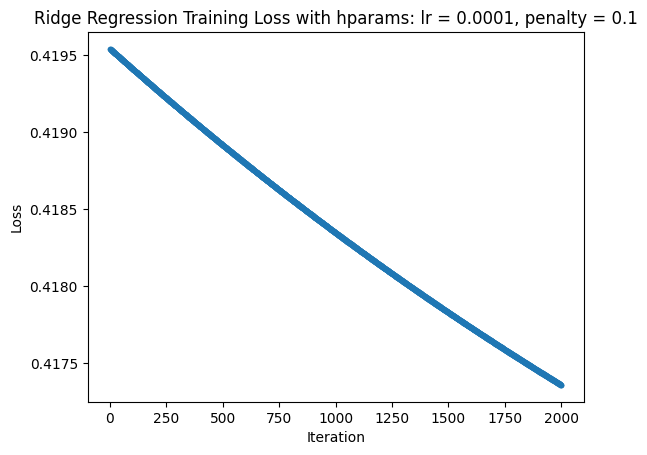

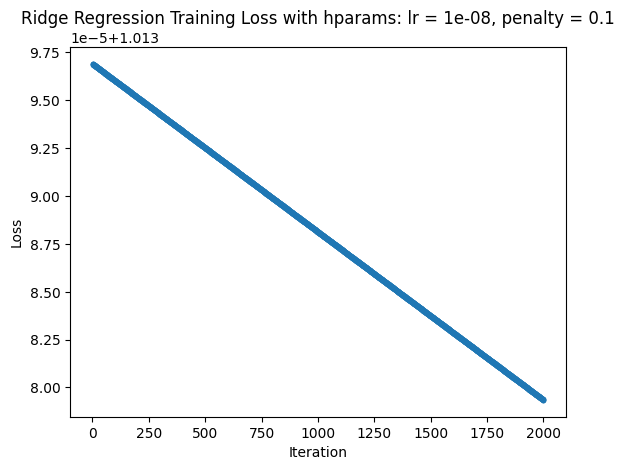

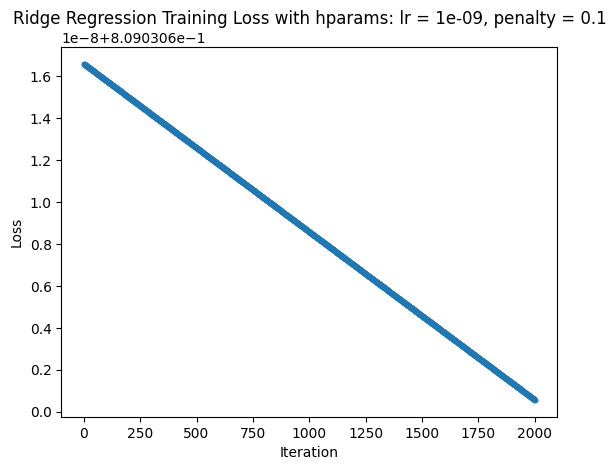

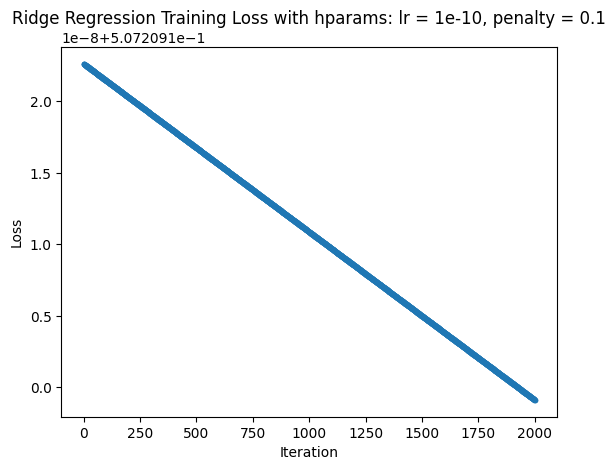

In [61]:
hyperparameters = {
    # Your Code Here
    'epochs':2000,
    'learning_rate': 1e-8,
    'penalty': 0.1

}
### Varying learning rate
learning_rates = [1e-1, 1e-2, 1e-4, 1e-8, 1e-9, 1e-10]

for lr in learning_rates:
  hyperparameters['learning_rate'] = lr 
  losses = train_entire_model(X_, y_, hyperparameters)
  visualise_loss_values(losses)

### 2) Varying penalty

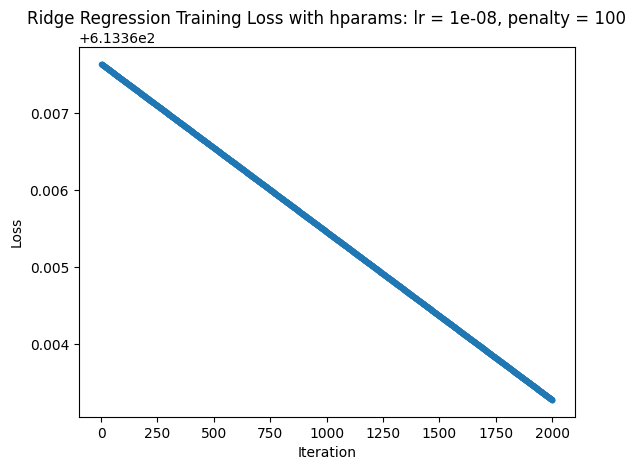

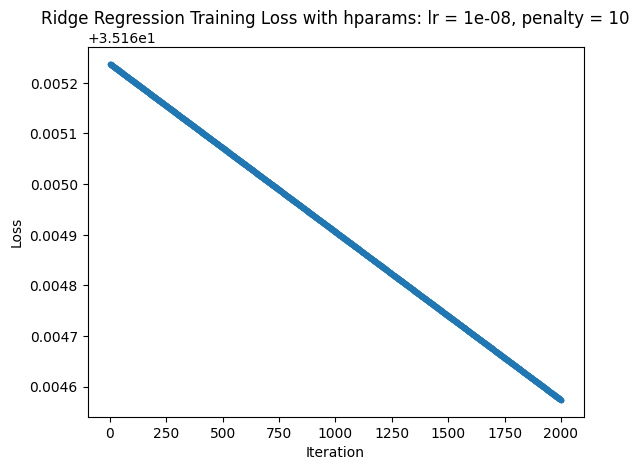

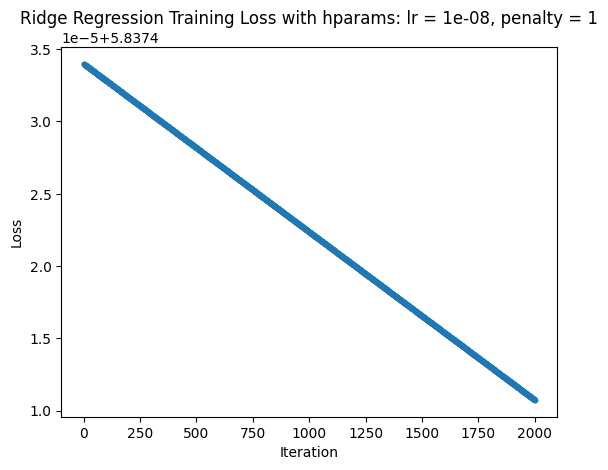

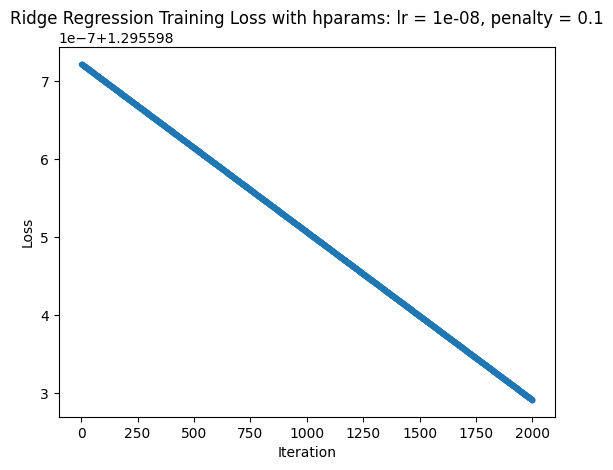

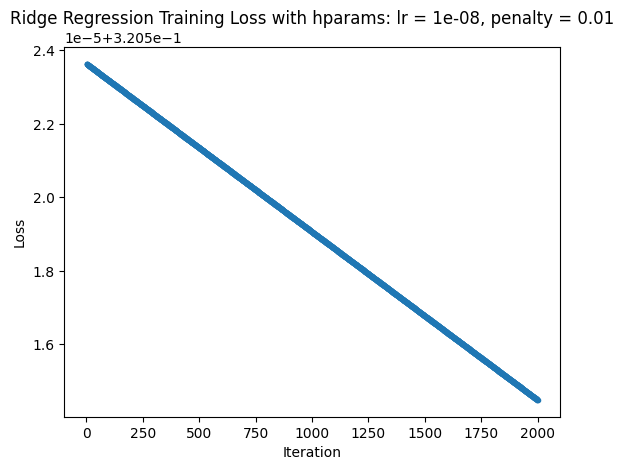

In [62]:
hyperparameters = {
    # Your Code Here
    'epochs':2000,
    'learning_rate': 1e-8,
    'penalty': 0.1

}
### Varying learning rate
penalties = [100, 10, 1, 0.1, 0.01]

for penalty in penalties:
  hyperparameters['penalty'] = penalty
  losses = train_entire_model(X_, y_, hyperparameters)
  visualise_loss_values(losses)

**Your Answer Here**

In all cases, the loss is decreasing over time. This is because I'm performing gradient descent, and I'm mathematically reaching a minimum of the OLS loss function. Changing hyperparameters, while controlling for number of epochs, affects rate of convergence, i.e. how fast can I reach a minimum and whether it is possible.

In terms of learning rate, only smaller learning rates (less than $10^{-8}$) reach the smalles loss values. This is because taking extremely small steps in the loss landscape ensures that I only reach the minimum without overshooting if I had a larger learning rate. There is slower convergence, but loss decrease is guaranteed.

In terms of penalty, I observe that larger penalty, such as $>1$ seems to penalize the model's parameters too greatly such that the model underfits. Despite it has its loss values decrease due to gradient descent, their loss values are orders of magnitudes greater than if I were to regularize with values $<1$ like $0.1$.  

## - End of Coursework - 